**Name:** Mosab Mohamed</br>
**Email:** o.mohamed@innopolis.university


<h3>Imports:</h3>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


%matplotlib inline

<h3>Load Data:</h3>

In [30]:
df = pd.read_csv('a1_dataset.csv')

#Printing some information about the dataset
print(df.shape)
print(df.head())
print(df.describe())

(925, 8)
   target    var1     var2          var3   var4    var5 var6  \
0       0  509.18  417.681    Micronesia  138.0  393.00   no   
1       0  446.06  666.182      Dominica   81.0  352.05  yes   
2       1  235.50  398.097   Isle of Man   90.0  339.00   no   
3       0  306.02  518.163  Turkmenistan  102.0  439.25  yes   
4       0  453.08  600.156      Cameroon  105.0  422.95   no   

                  var7  
0  2019-07-20 13:21:37  
1  2019-04-04 21:30:46  
2  2019-03-03 02:59:37  
3  2019-03-19 08:00:58  
4  2019-03-18 13:22:35  
           target        var1        var2        var4        var5
count  925.000000  925.000000  925.000000  325.000000  925.000000
mean     0.496216  360.116562  548.390134  108.452308  325.393946
std      0.500256   87.866662  135.221460   26.325744   78.862779
min      0.000000  209.560000  139.965000   57.000000  163.000000
25%      0.000000  278.640000  467.373000   87.000000  257.900000
50%      0.000000  367.640000  569.841000  105.000000  342.3

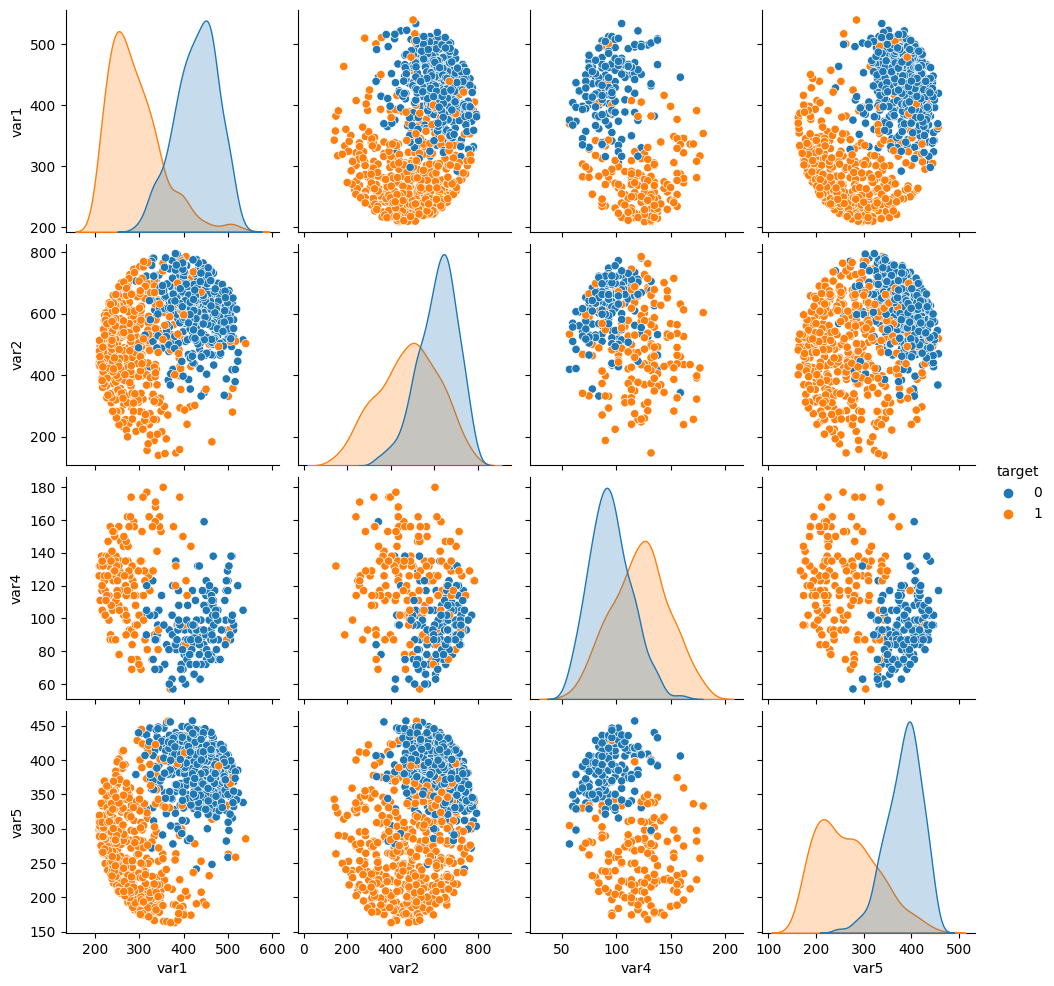

In [28]:
#Plotting pairwise relationships
sb.pairplot(df, hue='target')


<h1>Preprocessing</h1>

<h3>Encoding categorical values</h3>

<h4>Ordinal Encoding</h4>

In [ ]:
def ordinal_encoding(df, )

In [4]:
from sklearn.decomposition import PCA

def ohe_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    new_cols = pd.DataFrame(new_feats, dtype=int, columns=encoder.get_feature_names(features_name))
    #new_pca_cols = pd.DataFrame(PCA(2).fit_transform(new_cols))
    new_df = pd.concat([df, new_cols], axis=1)    
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df

In [5]:
encoder = OneHotEncoder(sparse=False, drop='first')
f_names = ['var3', 'var6']
encoder.fit(df[f_names])
df = ohe_new_features(df, f_names, encoder)
df

/home/iviosab/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,target,var1,var2,var4,var5,var3_Albania,var3_Algeria,var3_American Samoa,var3_Andorra,var3_Angola,...,var3_Uzbekistan,var3_Vanuatu,var3_Venezuela,var3_Vietnam,var3_Wallis and Futuna,var3_Western Sahara,var3_Yemen,var3_Zambia,var3_Zimbabwe,var6_yes
0,0,509.18,417.681,138.0,393.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,446.06,666.182,81.0,352.05,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,235.50,398.097,90.0,339.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,306.02,518.163,102.0,439.25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,453.08,600.156,105.0,422.95,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,0,422.34,547.259,NaN,350.45,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
921,1,342.62,473.919,NaN,200.85,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
922,1,265.10,538.170,NaN,208.35,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
923,0,397.12,622.386,NaN,433.45,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<h2>Data imputation</h2>

Splitting

In [6]:
#Split to NaN and known
var4_df = df[~df['var4'].isnull()]
var4_df_nan = df[df['var4'].isnull()]
df_corr = var4_df.corr()['var4'].abs().sort_values(ascending=False)
cols = df_corr[df_corr > 0.2].index.to_list()[1:]
cols
X = var4_df[cols]
y = var4_df.var4.values
#Split Known to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
#Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Linear Regression

In [8]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 18.553412219044727
Mean Squared Error: 579.2025699555186
Root Mean Squared Error: 24.066627722959414


Polynomial Regression

In [9]:
degree = 3
polynomial_features = PolynomialFeatures(degree=degree)
linear_regression = LinearRegression()

pipeline = Pipeline([("polynomial_features", polynomial_features),
                      ("linear_regression", linear_regression)])
pipeline.fit(X_train,y_train)

y_pred_poly = pipeline.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_poly))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_poly))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))


Mean Absolute Error: 14.384164663461538
Mean Squared Error: 438.9522550729605
Root Mean Squared Error: 20.951187438256586


In [10]:
var4_df_dropped = var4_df_nan[cols]
var4_df_var4 = var4_df['var4']
var4_df_dropped



,target,var1,var5,var2
325,1,304.98,444.85,492.700
326,1,302.36,177.75,515.935
327,1,261.68,412.45,386.454
328,1,317.60,323.15,155.983
329,0,465.08,421.45,606.384
...,...,...,...,...
920,0,422.34,350.45,547.259
921,1,342.62,200.85,473.919
922,1,265.10,208.35,538.170
923,0,397.12,433.45,622.386


In [11]:

X = var4_df_dropped
X = scaler.transform(X)

poly_var4 = pipeline.predict(X)
poly_var4 = np.append(y, poly_var4, 0)
poly_df = df.drop('var4', axis=1)
poly_var4 = pd.DataFrame(poly_var4, dtype=int, columns=['var4'])
poly_df = pd.concat([poly_df, poly_var4], axis=1)


/tmp/ipykernel_232825/2093316582.py:7: FutureWarning: In a future version, passing float-dtype values and an integer dtype to DataFrame will retain floating dtype if they cannot be cast losslessly (matching Series behavior). To retain the old behavior, use DataFrame(data).astype(dtype)
  poly_var4 = pd.DataFrame(poly_var4, dtype=int, columns=['var4'])


PCA TODO

In [12]:
df = poly_df
df

,target,var1,var2,var5,var3_Albania,var3_Algeria,var3_American Samoa,var3_Andorra,var3_Angola,var3_Anguilla,...,var3_Vanuatu,var3_Venezuela,var3_Vietnam,var3_Wallis and Futuna,var3_Western Sahara,var3_Yemen,var3_Zambia,var3_Zimbabwe,var6_yes,var4
0,0,509.18,417.681,393.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,138
1,0,446.06,666.182,352.05,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,81
2,1,235.50,398.097,339.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,90
3,0,306.02,518.163,439.25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,102
4,0,453.08,600.156,422.95,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,0,422.34,547.259,350.45,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,59
921,1,342.62,473.919,200.85,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,133
922,1,265.10,538.170,208.35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,120
923,0,397.12,622.386,433.45,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,100


In [13]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # covariance, function needs samples as columns
        cov = np.cov(X.T)

        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        # store first n eigenvectors
        self.components = eigenvectors[0 : self.n_components]

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)


In [14]:
def plot(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  pca = PCA(n_components=2)
  pca.fit(X_train)
  X_train = pca.transform(X_train)
  feature1 = X_train[:, 0]
  feature2 = X_train[:, 1]
  plt.scatter(
        feature1, feature2, c=y_train, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
    )

  plt.colorbar()
  plt.xlabel("Component 1")
  plt.ylabel("Component 2")
  plt.show()

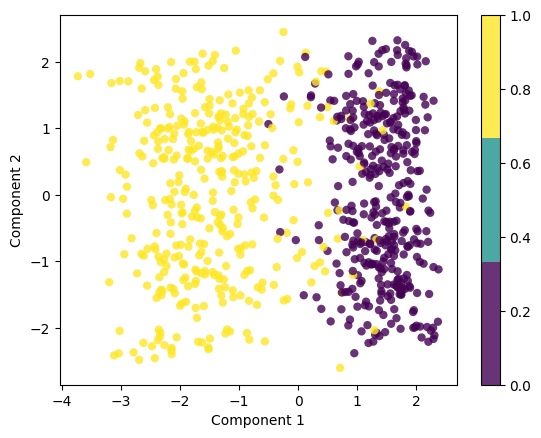

In [15]:
X = df.drop('target', axis=1)
y = df['target']
plot(X, y)

<h1>TRAINING</h1>

In [16]:
df_corr = poly_df.corr()['target'].abs().sort_values(ascending=False)
features = df_corr[df_corr > 0.1].index.to_list()[1:]
features
print(list(df_corr))

[1.0, 0.7840982038577144, 0.7478031750023011, 0.5990027645050946, 0.49549232896140505, 0.08141501084730277, 0.08019203858135622, 0.07428099355554883, 0.07316518463947855, 0.07316518463947846, 0.07316518463947846, 0.07316518463947845, 0.0707610282772215, 0.06640286170011371, 0.06640286170011367, 0.06640286170011364, 0.0664028617001136, 0.06540539382049824, 0.06540539382049816, 0.06540539382049813, 0.06303605861280205, 0.05747537088284267, 0.05747537088284263, 0.05747537088284262, 0.057475370882842505, 0.05661200694254232, 0.056612006942542294, 0.056612006942542294, 0.05661200694254229, 0.05325753034324635, 0.04740963649825972, 0.04690301523183945, 0.046903015231839436, 0.04690301523183939, 0.04690301523183936, 0.046903015231839346, 0.04690301523183933, 0.04690301523183933, 0.046198463500888944, 0.046198463500888944, 0.04619846350088894, 0.04619846350088894, 0.04619846350088894, 0.04619846350088894, 0.04619846350088894, 0.04619846350088894, 0.04619846350088893, 0.04619846350088892, 0.046

In [17]:
#logistic
X = poly_df[features]
y = poly_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
param_grid = {
    'C': [100, 10, 1.0, 0.1, 0.01],
    'max_iter': [500, 1000, 2000]
}
clf = LogisticRegression()

grid_search_clf = GridSearchCV(estimator=clf,
                        cv=3, scoring='accuracy',
                        param_grid=param_grid)

grid_search_clf.fit(X_train, y_train)
y_test_pred = grid_search_clf.predict(X_test)

print('Testing accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Testing precision = {}'.format(metrics.precision_score(y_test, y_test_pred)))
print('Testing recall = {}'.format(metrics.recall_score(y_test, y_test_pred)))


Testing accuracy = 0.972972972972973
Testing precision = 0.9662921348314607
Testing recall = 0.9772727272727273


In [18]:
#logistic with pca
X = poly_df.drop('target', axis=1)
y = poly_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=2)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
param_grid = {
    'C': [100, 10, 1.0, 0.1, 0.01],
    'max_iter': [500, 1000, 2000]
}
clf = LogisticRegression()

grid_search_clf = GridSearchCV(estimator=clf,
                        cv=3, scoring='accuracy',
                        param_grid=param_grid)

grid_search_clf.fit(X_train, y_train)
y_test_pred = grid_search_clf.predict(X_test)

print('Testing accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Testing precision = {}'.format(metrics.precision_score(y_test, y_test_pred)))
print('Testing recall = {}'.format(metrics.recall_score(y_test, y_test_pred)))


Testing accuracy = 0.9243243243243243
Testing precision = 0.9204545454545454
Testing recall = 0.9204545454545454


In [19]:
#KNN
X = poly_df[features]
y = poly_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
param_grid = {'n_neighbors':list(range(1, 11)),
              'weights':['uniform', 'distance'],
              'metric':['euclidean', 'manhattan', 'chebyshev', 'cosine']
              }
clf = KNeighborsClassifier()
grid_search_clf = GridSearchCV(estimator=clf,
                        cv=3, scoring='accuracy',
                        param_grid=param_grid)

grid_search_clf.fit(X_train, y_train)
y_test_pred = grid_search_clf.predict(X_test)
print(grid_search_clf.best_params_)
print('Testing accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Testing precision = {}'.format(metrics.precision_score(y_test, y_test_pred)))
print('Testing recall = {}'.format(metrics.recall_score(y_test, y_test_pred)))


{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Testing accuracy = 0.9837837837837838
Testing precision = 1.0
Testing recall = 0.9659090909090909


In [20]:
#KNN with pca
X = poly_df.drop('target', axis=1)
y = poly_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=2)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
param_grid = {'n_neighbors':list(range(1, 11)),
              'weights':['uniform', 'distance'],
              'metric':['euclidean', 'manhattan', 'chebyshev', 'cosine']
              }
clf = KNeighborsClassifier()
grid_search_clf = GridSearchCV(estimator=clf,
                        cv=3, scoring='accuracy',
                        param_grid=param_grid)

grid_search_clf.fit(X_train, y_train)
y_test_pred = grid_search_clf.predict(X_test)
print('Testing accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Testing precision = {}'.format(metrics.precision_score(y_test, y_test_pred)))
print('Testing recall = {}'.format(metrics.recall_score(y_test, y_test_pred)))


Testing accuracy = 0.9027027027027027
Testing precision = 0.8645833333333334
Testing recall = 0.9431818181818182


In [21]:
#Naive 
X = poly_df[features]
y = poly_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
gauss_nb = GaussianNB()

grid_search_clf = GridSearchCV(estimator=gauss_nb,
                        cv=3, scoring='accuracy',
                        param_grid=param_grid)

grid_search_clf.fit(X_train, y_train)
y_test_pred = grid_search_clf.predict(X_test)

print('Testing accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Testing precision = {}'.format(metrics.precision_score(y_test, y_test_pred)))
print('Testing recall = {}'.format(metrics.recall_score(y_test, y_test_pred)))


Testing accuracy = 0.972972972972973
Testing precision = 0.9770114942528736
Testing recall = 0.9659090909090909


In [22]:
#Naive with pca
X = poly_df[features]
y = poly_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pca = PCA(n_components=2)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
clf = LogisticRegression()

grid_search_clf = GridSearchCV(estimator=gauss_nb,
                        cv=3, scoring='accuracy',
                        param_grid=param_grid)

grid_search_clf.fit(X_train, y_train)
y_test_pred = grid_search_clf.predict(X_test)

print('Testing accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Testing precision = {}'.format(metrics.precision_score(y_test, y_test_pred)))
print('Testing recall = {}'.format(metrics.recall_score(y_test, y_test_pred)))


Testing accuracy = 0.9567567567567568
Testing precision = 0.9651162790697675
Testing recall = 0.9431818181818182
